In [2]:
import cv2 as cv
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

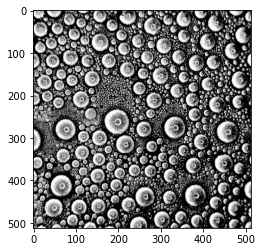

In [3]:
im_in_actual = cv.imread("C:\\Users\\grdmg\\Desktop\\deep\\image_5000.jpeg")
frame_rate = 5000
plt.imshow(im_in_actual)
plt.show()

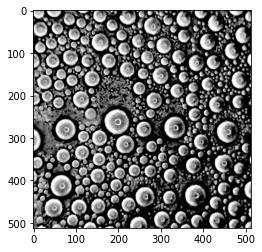

True

In [4]:
# blur the original image

im_blur2 = cv.medianBlur(im_in_actual, 3)
im_blur1 = cv.medianBlur(im_blur2, 3)
im_blur = cv.medianBlur(im_blur1, 3)

plt.imshow(im_blur)
plt.show()

cv.imwrite("image_5000_step1_Blur.jpeg", im_blur)

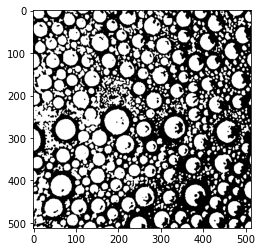

True

In [14]:
# thresholding the original image

th, im_th = cv.threshold(im_blur, 90, 255, cv.THRESH_BINARY);
plt.imshow(im_th)
plt.show()
cv.imwrite("image_5000_step2_thresh.jpeg", im_th)


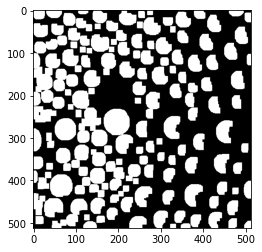

In [21]:
kernel = np.ones((5, 5), np.uint8)
erosion = cv.erode(im_th, kernel, iterations=2)
dilation = cv.dilate(erosion, kernel, iterations=3)
plt.imshow(dilation)
plt.show()
cv.imwrite("image_5000_step3_dilation.jpeg", dilation)

dilation = cv.cvtColor(dilation, cv.COLOR_BGR2GRAY)

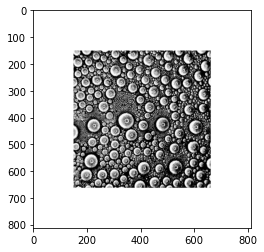

In [22]:
h, w = im_in_actual.shape[:2]
white = np.zeros([h + 300, w + 300, 3], dtype=np.uint8)
white.fill(255)
for i in range(1, h, 1):
    for j in range(1, w, 1):
        white[i + 150, j + 150] = im_in_actual[i, j]
framed_image = white
#framed_image = cv.cvtColor(framed_image, cv.COLOR_BGR2GRAY)
plt.imshow(framed_image)
plt.show()

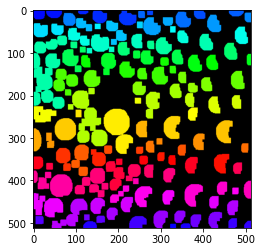

array([[     0,      0,    512,    512, 143149],
       [     0,      0,     28,     22,    573],
       [    31,      0,     37,     19,    605],
       [   106,      0,     24,     10,    222],
       [   140,      0,     34,     31,    871],
       [   202,      0,     41,     36,   1110],
       [   268,      0,     14,     12,    167],
       [   378,      0,     27,     21,    511],
       [   460,      0,     35,     15,    452],
       [   247,      2,     16,     17,    265],
       [   335,      4,     36,     37,   1060],
       [    71,      7,     29,     30,    774],
       [   497,      6,     15,     23,    325],
       [   409,     11,     33,     41,   1046],
       [   259,     17,     41,     42,   1294],
       [   305,     17,     24,     20,    448],
       [   101,     19,     38,     31,    752],
       [   172,     25,     48,     57,   1341],
       [   244,     27,     14,     16,    223],
       [     0,     31,     35,     33,   1002],
       [    43,     

In [29]:
def CC(img):
    nlabels, labels, stats, centroids = cv.connectedComponentsWithStats(img)
    label_hue = np.uint8(179 * labels / np.max(labels))
    blank_ch = 255 * np.ones_like(label_hue)
    labeled_img = cv.merge([label_hue, blank_ch, blank_ch])
    labeled_img = cv.cvtColor(labeled_img, cv.COLOR_HSV2BGR)
    labeled_img[label_hue == 0] = 0
    return labeled_img, nlabels, labels, stats, centroids

components, nlabels, labels, stats, centroids = CC(dilation)

plt.imshow(components)
plt.show()

cv.imwrite("image_5000_step4_components.jpeg", components)

stats

In [30]:
final_stats = []
final_centroids = []
f_stat_counter = 0
for i in range(stats.shape[0]):
    if (stats[i][0] < 5) or (stats[i][1] < 5) or (stats[i][4] > 1000):
        pass
    else:
        final_stats.append(stats[i])
        final_centroids.append(centroids[i])

print(final_stats)

[array([ 71,   7,  29,  30, 774], dtype=int32), array([497,   6,  15,  23, 325], dtype=int32), array([305,  17,  24,  20, 448], dtype=int32), array([101,  19,  38,  31, 752], dtype=int32), array([244,  27,  14,  16, 223], dtype=int32), array([ 43,  32,  29,  27, 666], dtype=int32), array([145,  32,  14,  13, 182], dtype=int32), array([322,  38,  13,  15, 195], dtype=int32), array([339,  48,  26,  30, 657], dtype=int32), array([231,  56,  26,  34, 777], dtype=int32), array([268,  72,  17,  20, 321], dtype=int32), array([ 88,  74,  16,  16, 250], dtype=int32), array([199,  75,  28,  32, 744], dtype=int32), array([110,  86,  14,  14, 195], dtype=int32), array([326,  93,  27,  35, 788], dtype=int32), array([235,  95,  17,  19, 311], dtype=int32), array([253,  95,  30,  33, 827], dtype=int32), array([502, 103,  10,  27, 255], dtype=int32), array([407, 105,  28,  36, 822], dtype=int32), array([113, 106,  22,  29, 559], dtype=int32), array([299, 111,  20,  20, 375], dtype=int32), array([321, 

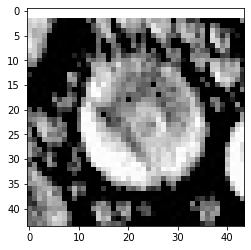

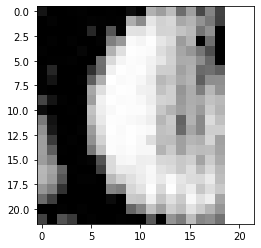

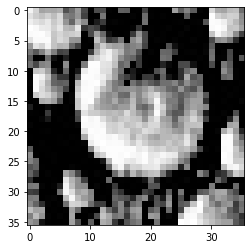

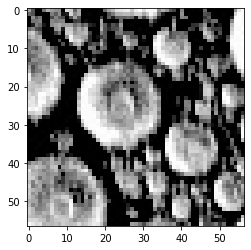

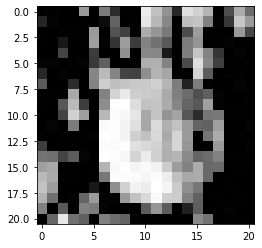

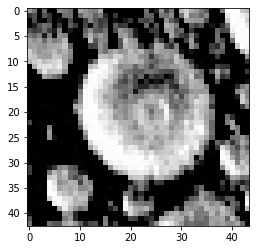

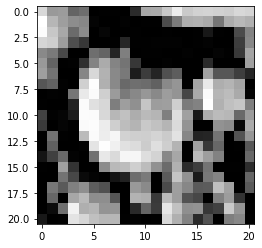

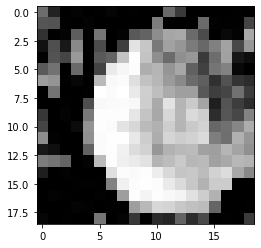

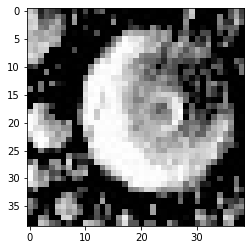

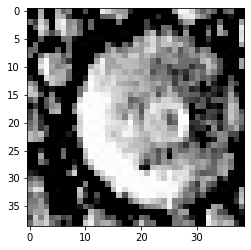

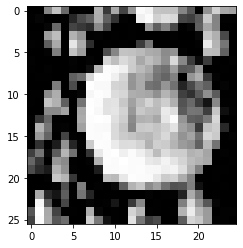

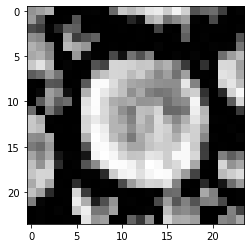

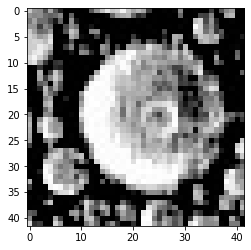

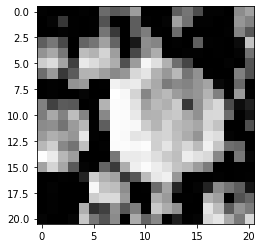

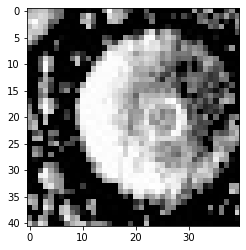

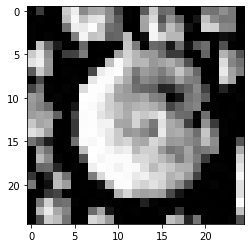

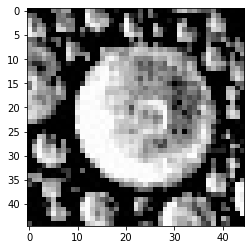

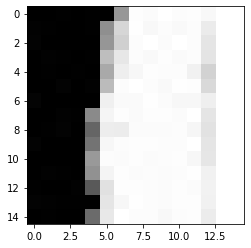

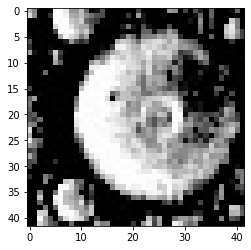

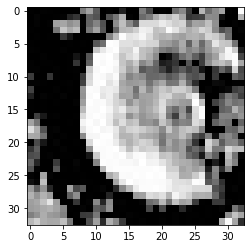

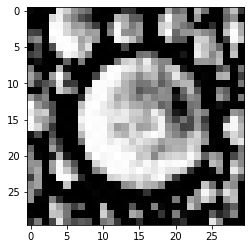

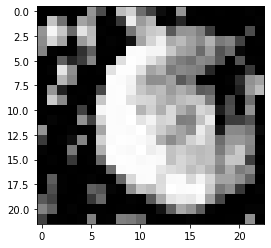

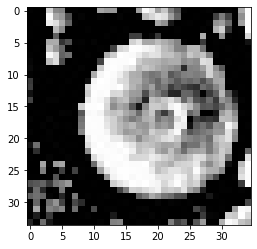

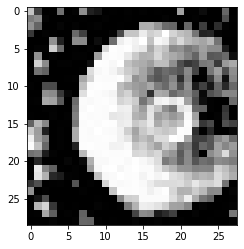

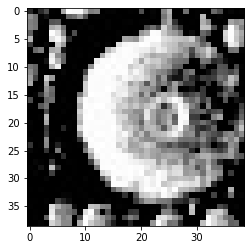

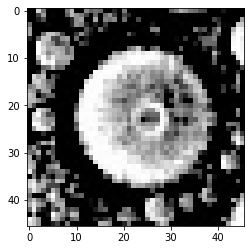

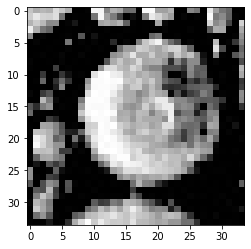

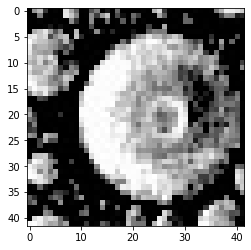

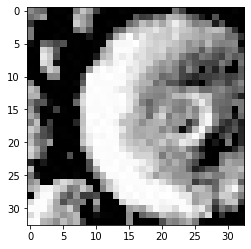

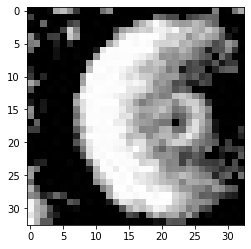

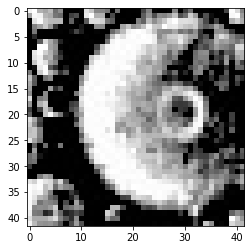

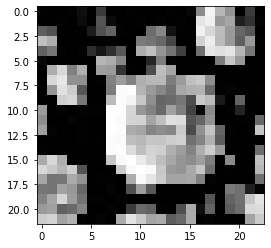

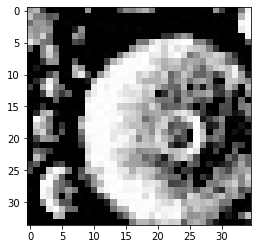

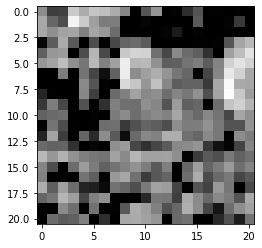

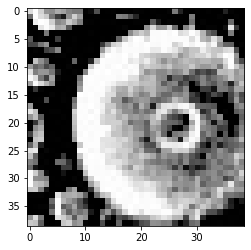

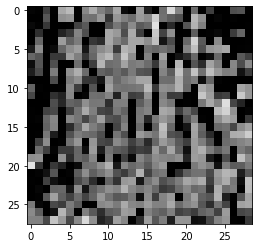

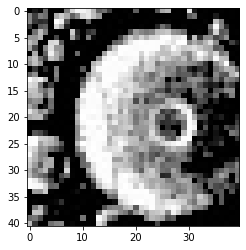

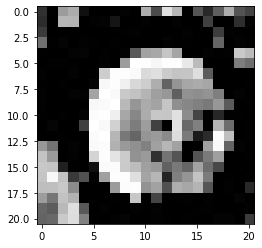

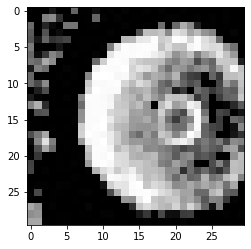

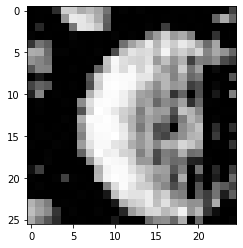

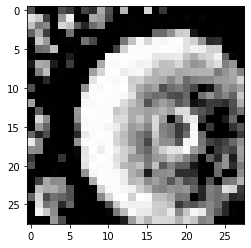

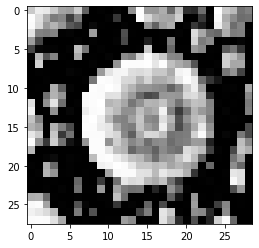

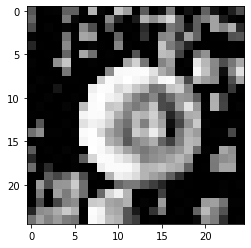

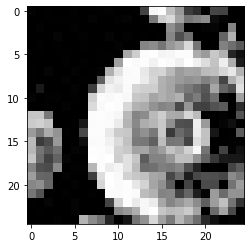

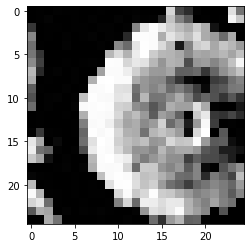

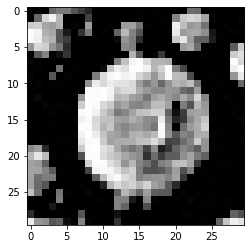

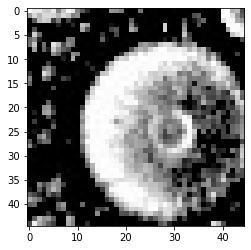

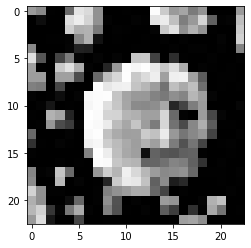

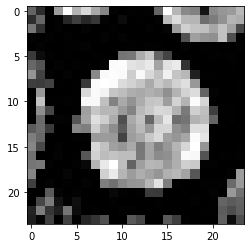

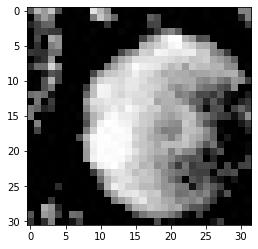

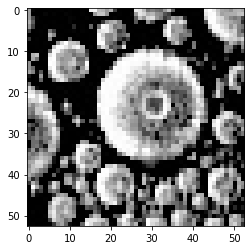

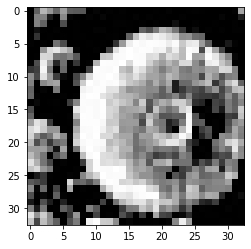

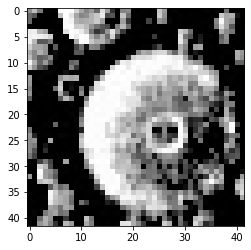

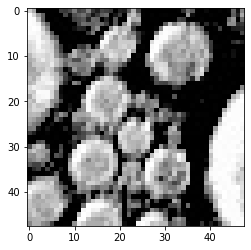

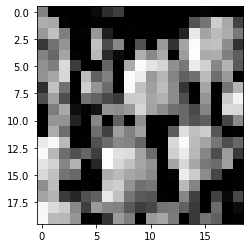

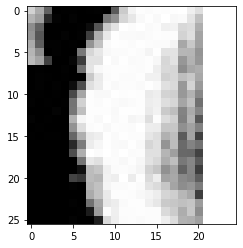

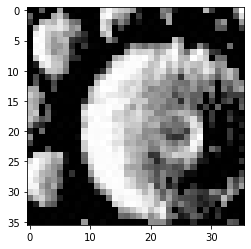

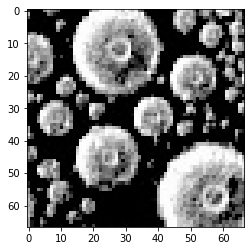

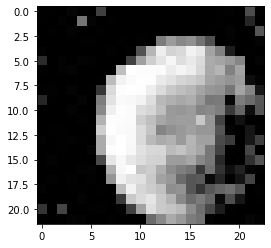

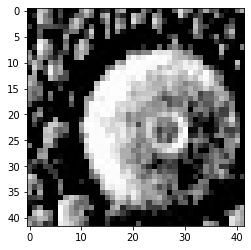

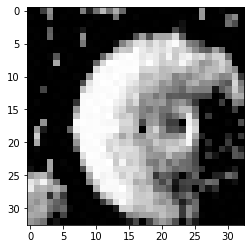

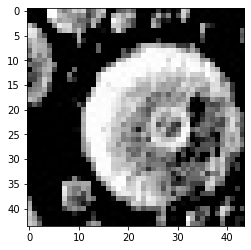

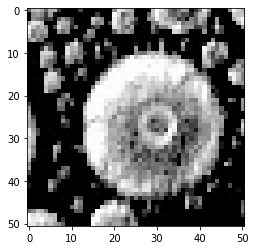

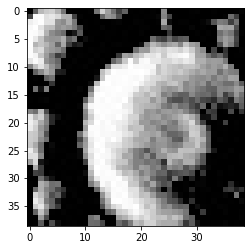

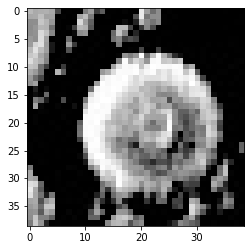

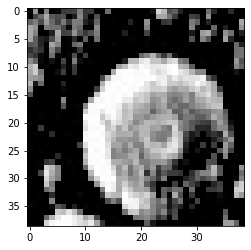

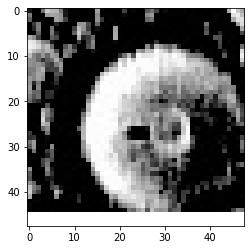

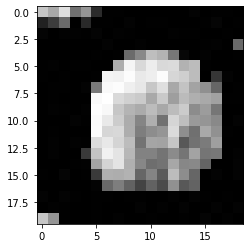

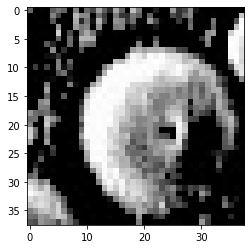

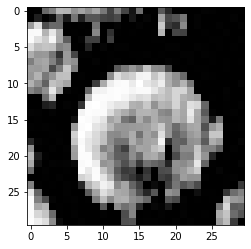

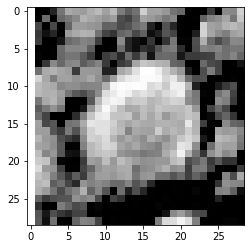

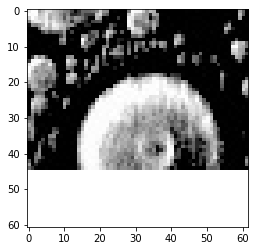

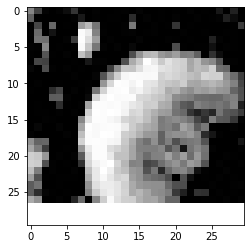

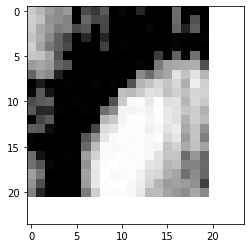

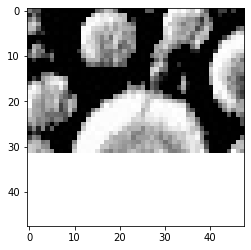

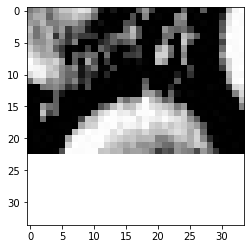

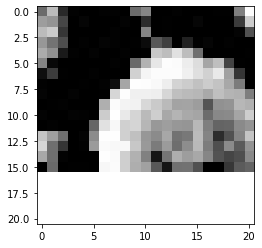

In [31]:
for i in range(len(final_stats)):
    crop_img = framed_image[
                   int(final_centroids[i][1] - (1.5*((final_stats[i][2])/2)) + 150):int(
                       final_centroids[i][1] + (1.5*((final_stats[i][2])/2)) + 150), int(final_centroids[i][0] - (1.5*((final_stats[i][2])/2)) + 150):int(
                       final_centroids[i][0] + (1.5*((final_stats[i][2])/2)) + 150)]
    cv.imwrite(f"droplet n{i}.jpeg", crop_img)

    plt.imshow(crop_img)
    plt.show()